<a href="https://colab.research.google.com/github/Marel88/Bioinfo_7_1/blob/master/Bio_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FOR GOOGLE DRIVE IMPORT**

**Auth Code: **  4/OAHVO-FYe-We-bQDjlsGLYHCnoXXO7QhiqEVqnID3ZwYv8rbWxamVQI



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**DATASET PRE PROCESSING**

In [0]:
!pip3 install --user --upgrade pip
#!pip install py_wsi --no-index --find-links file:///Users/Mac/Desktop/py-wsi-1.1.zip
!pip install py_wsi --no-index --find-links "/content/gdrive/My Drive/Bioinformatica/py-wsi-1.1.zip"

!pip install openslide-python
!apt-get install libopenslide-dev
#SCRIPT FOR IMAGE CROPPING


import py_wsi
import py_wsi.imagepy_toolkit as tk
from py_wsi import turtle
from pathlib import Path

#location = "/Users/Mac/Desktop/ROI-dataset-bioinf/Img_Dataset/" #destination folder for png patches
location = "/content/gdrive/My Drive/Bioinformatica/Py_wsi-Test_folder-Destination/" #destination folder for png patches

def wsi_cropping(path):
    folders = [path + "/Healthy/", path + "/Benign/", path + "/Cancer/"]
    
    for folder in folders:
        file_dir=folder
        p = Path(folder)
        part = p.parts #the path is broken into parts
        db_location= location + part[6] + part[0] + part[7] #change the number according to the path lenght in order to add the type of folder plus the type of tissue
        print(file_dir)
        print(db_location)
        
        xml_dir = file_dir
        patch_size = 224
        level = 10
        db_name = ""
        overlap = 0

        # All possible labels mapped to integer ids in order of increasing severity.
        label_map = {}

        turtle_obj = turtle.Turtle(file_dir, db_location, db_name, xml_dir=xml_dir, label_map=label_map, storage_type='disk')
        turtle_obj.sample_and_store_patches(patch_size, level, overlap, load_xml=False, limit_bounds=True)
        
    return;

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.1.1)
Looking in links: /content/gdrive/My Drive/Bioinformatica/py-wsi-1.1.zip
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopenslide-dev is already the newest version (3.4.1+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [0]:
#LOOP TO CROP WSI PER FOLDERS

#main_path="/Users/Mac/Desktop/ROI-dataset-bioinf" #source folder with svs in it
main_path="/content/gdrive/My Drive/Bioinformatica/Py_wsi-Test_folder-Source" #source folder with svs in it
main_folders = [main_path + "/Test", main_path + "/Training", main_path + "/Validation"]

for main_folder in main_folders:
    new_path = main_folder
    wsi_cropping(new_path)

/content/gdrive/My Drive/Bioinformatica/Py_wsi-Test_folder-Source/Test/Healthy/
/content/gdrive/My Drive/Bioinformatica/Py_wsi-Test_folder-Destination/Test/Healthy
Storage type:               disk
Images directory:           /content/gdrive/My Drive/Bioinformatica/Py_wsi-Test_folder-Source/Test/Healthy/
Data store directory:       /content/gdrive/My Drive/Bioinformatica/Py_wsi-Test_folder-Destination/Test/Healthy
Images found:               1
7_H_1.svs 
============ Patches Dataset Stats ===========
Total patches sampled:                     3
Patches saved to:                          /content/gdrive/My Drive/Bioinformatica/Py_wsi-Test_folder-Destination/Test/Healthy
Patches saved with prefix:                 

Time usage: 0:00:01
/content/gdrive/My Drive/Bioinformatica/Py_wsi-Test_folder-Source/Test/Benign/
/content/gdrive/My Drive/Bioinformatica/Py_wsi-Test_folder-Destination/Test/Benign
Storage type:               disk
Images directory:           /content/gdrive/My Drive/Bioinforma

In [0]:
from pathlib import Path
p=Path(main_path)

pezzi = p.parts
pezzi[0] + pezzi[4] + pezzi[0] + pezzi[5]

'/Bioinformatica/Py_wsi-Test_folder-Source'

**SCRIPT FOR ERASING ONLY WHITE IMAGES**

In [0]:
#the function for deleting white patches

import cv2
import os
import glob

def deleteWhite(path):                                              #path is the path of the Patches folder
    """Function that deletes all patches that are completely (or mostly) white."""

    folders = [path + "/Healthy", path + "/Benign", path + "/Cancer"]
    for folder in folders:                                          #loops through the three folders of patches
        count = 0
        for filename in glob.glob(os.path.join(folder, '*.png')):   #sequentially selects each .png file in the current folder
            img = cv2.imread(filename)
            (x,y,z) = img.shape                                     #img.shap is 64 64 3
            white = 0
            for i in range(0,x):                                    #analyzes the image pixel by pixel
                for j in range(0,y):
                    pixel = img[i,j]
                    b = pixel[0]
                    g = pixel[1]
                    r = pixel[2]
                    if b == 255:                                    #if b,g,r are all 255 it means the pixel is white
                    #if b == 211:   
                      if g == 255:
                      #if g == 211:
                          if r == 255:
                          #if r == 211:
                                white = white + 1                   #I use white as a counter to keep track of the number of white pixels
                    if white > 50:                                  #in the dataset that we have, an image having a few white pixels means it will be almost all white
                        break                                       #thus to make the process a bit shorter I only count to 50 white pixels and then break the loop, since it is unneded to count further
                if white > 50:
                    break
            if white > 50:                                          #if a patch is found to have many white pixels (which means it will be mostly white) I delete it from its folder
                os.remove(filename)
                count = count + 1
        print("Deleted",count,"patches in",folder)

    return;

In [0]:
#LOOP TO CLEAN UP FOLDERS

#main_path="/content/gdrive/My Drive/Bioinformatica/Organized dataset"
main_path='/Users/Mac/Desktop/ROI-dataset-bioinf/Img_Dataset'
main_folders = [main_path + "/Test", main_path + "/Training", main_path + "/Validation"]
for main_folder in main_folders:
    new_path = main_folder
    deleteWhite(new_path)

Deleted 8 patches in /Users/Mac/Desktop/ROI-dataset-bioinf/Img_Dataset//Test/Healthy
Deleted 4 patches in /Users/Mac/Desktop/ROI-dataset-bioinf/Img_Dataset//Test/Benign
Deleted 6 patches in /Users/Mac/Desktop/ROI-dataset-bioinf/Img_Dataset//Test/Cancer
Deleted 34 patches in /Users/Mac/Desktop/ROI-dataset-bioinf/Img_Dataset//Training/Healthy
Deleted 30 patches in /Users/Mac/Desktop/ROI-dataset-bioinf/Img_Dataset//Training/Benign
Deleted 20 patches in /Users/Mac/Desktop/ROI-dataset-bioinf/Img_Dataset//Training/Cancer
Deleted 20 patches in /Users/Mac/Desktop/ROI-dataset-bioinf/Img_Dataset//Validation/Healthy
Deleted 8 patches in /Users/Mac/Desktop/ROI-dataset-bioinf/Img_Dataset//Validation/Benign
Deleted 10 patches in /Users/Mac/Desktop/ROI-dataset-bioinf/Img_Dataset//Validation/Cancer


**CNN BASE**

In [0]:
#CNN BASE MODEL - DATA LOADING

import numpy as np
!pip3 install keras
#!pip3 install tensorflow==1.5.0
!pip3 install tensorflow
!pip install mxnet-mkl
!pip3 install sklearn
!pip3 install keras_tqdm
!pip install scipy
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import *
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
train_path="/content/gdrive/My Drive/Bioinformatica/Organized dataset/Training/Patches"
#train_path="/Users/Mac/Desktop/ROI-dataset-bioinf/Training/Patches/"
valid_path="/content/gdrive/My Drive/Bioinformatica/Organized dataset/Validation/Patches"
#valid_path="/Users/Mac/Desktop/ROI-dataset-bioinf/Validation/Patches"
#test_path ="/Users/Mac/Desktop/ROI-dataset-bioinf/Test/Patches"
test_path="/content/gdrive/My Drive/Bioinformatica/Organized dataset/Test/Patches"

In [0]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['Benign', 'Healthy', 'Cancer'], batch_size=32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['Benign', 'Healthy', 'Cancer'], batch_size=32)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['Benign', 'Healthy', 'Cancer'], batch_size=32)

In [0]:
#For plotting images with labels
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
imgs, labels = next(train_batches)

#plots(imgs,titles=labels)


In [0]:
#CNN MODEL BUILDING
model = Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)), Flatten(), Dense(3, activation='softmax'),])
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_batches, steps_per_epoch=22, validation_data=valid_batches, validation_steps=22, epochs=5, verbose=2)


In [0]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles = test_labels)
#test_labels = test_labels[:,0]
test_labels

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [0]:
predictions

In [0]:
!pip3 install -U scikit-learn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predictions)

In [0]:
#MULTI-LABEL CONFUSION MATRIX

y_test_non_category = [ np.argmax(t) for t in test_labels ]
y_predict_non_category = [ np.argmax(t) for t in predictions ]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)

In [0]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):

#This function prints and plots the confusion matrix.
#Normalization can ben applied by setting 'normalize-True'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
           plt.text(j, i, "{:0.2f}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
        else:
           plt.text(j, i, format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [0]:
cm_plot_labels = ['Benign','Healthy','Cancer']
plot_confusion_matrix(conf_mat, cm_plot_labels,title ='Confusion Matrix')

**FIN QUI TUTTO OK, IL MODELLO FA SCHIFO MA TECNICAMENTE FA QUELLO CHE DEVE FARE, SE LA CONFUSION MATRIX È GIUSTA, HO TROVATO COME PLOTTARLA CON UN MODELLO A MULTI LABEL**

**FINE TUNING OF VGG16** 

In [0]:
#FINE TUNING OF A PRE-TRAINED MODEL (VGG16)

import numpy as np
!pip3 install keras
#!pip3 install tensorflow==1.5.0
!pip3 install tensorflow
!pip install mxnet-mkl
!pip3 install sklearn
!pip3 install keras_tqdm
!pip install scipy
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import *
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

vgg16_model = keras.applications.vgg16.VGG16()


In [0]:
vgg16_model.summary()


In [0]:
train_path="/content/gdrive/My Drive/Bioinformatica/Organized dataset/Training/Patches"
#train_path="/Users/Mac/Desktop/ROI-dataset-bioinf/Training/Patches/"
valid_path="/content/gdrive/My Drive/Bioinformatica/Organized dataset/Validation/Patches"
#valid_path="/Users/Mac/Desktop/ROI-dataset-bioinf/Validation/Patches"
#test_path ="/Users/Mac/Desktop/ROI-dataset-bioinf/Test/Patches"
test_path="/content/gdrive/My Drive/Bioinformatica/Organized dataset/Test/Patches"

#FATTO DA CHIARA QUESTO AUGMENT?
gen = ImageDataGenerator(rotation_range=10, shear_range=0.15, channel_shift_range=10., horizontal_flip=True)

train_batches = gen.flow_from_directory(train_path, target_size=(224,224), classes=['Benign', 'Healthy', 'Cancer'], batch_size=100)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['Benign', 'Healthy', 'Cancer'], batch_size=100)
test_batches = ImageDataGenerator().flow_from_directory(test_path, shuffle=False, target_size=(224,224), classes=['Benign', 'Healthy', 'Cancer'], batch_size=100)

#added shuffle=False for test_batches

Found 2263 images belonging to 3 classes.
Found 1053 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
type(vgg16_model)
#create a Sequential model in which we add all the layers of the VGG16 model
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  #all layers except for the last one which is the predictions layers we don't want
    model.add(layer)
    
#model.summary()

In [0]:
for layer in model.layers:
    layer.trainable = False


In [0]:
model.add(Dense(3, activation='softmax'))

#model.summary()

In [0]:
#TRAIN THE VGG16 MODEL
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

#TRY TO COMPILE WITH SGD OPTIMIZER AND DEFINE MOMENTUM, TRY TO RUN LONGER EPOCHS, TRY TO TAKE BIGGER BATCHES

#steps per epoch and validation step = dataset size / batch size
#keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
#Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=True), loss ='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_batches, steps_per_epoch=train_batches.samples/train_batches.batch_size, validation_data=valid_batches, validation_steps=valid_batches.samples/valid_batches.batch_size, epochs=100, verbose=2)#, callbacks=[es])
#model.save('/content/gdrive/My Drive/Bioinformatica/FirstVGG16.h5')

Epoch 1/100
 - 45s - loss: 0.0868 - acc: 0.9694 - val_loss: 0.5176 - val_acc: 0.7882
Epoch 2/100
 - 23s - loss: 0.0901 - acc: 0.9704 - val_loss: 0.6044 - val_acc: 0.7635
Epoch 3/100
 - 28s - loss: 0.0923 - acc: 0.9671 - val_loss: 0.5375 - val_acc: 0.7816
Epoch 4/100
 - 29s - loss: 0.0941 - acc: 0.9695 - val_loss: 0.5534 - val_acc: 0.7768
Epoch 5/100
 - 28s - loss: 0.0920 - acc: 0.9686 - val_loss: 0.5387 - val_acc: 0.7787
Epoch 6/100
 - 28s - loss: 0.0879 - acc: 0.9736 - val_loss: 0.5942 - val_acc: 0.7673
Epoch 7/100
 - 29s - loss: 0.0862 - acc: 0.9726 - val_loss: 0.5408 - val_acc: 0.7797
Epoch 8/100
 - 30s - loss: 0.0858 - acc: 0.9695 - val_loss: 0.5561 - val_acc: 0.7768
Epoch 9/100
 - 28s - loss: 0.0834 - acc: 0.9760 - val_loss: 0.5568 - val_acc: 0.7768
Epoch 10/100
 - 29s - loss: 0.0840 - acc: 0.9732 - val_loss: 0.5482 - val_acc: 0.7797
Epoch 11/100
 - 28s - loss: 0.0829 - acc: 0.9723 - val_loss: 0.5557 - val_acc: 0.7759
Epoch 12/100
 - 28s - loss: 0.0847 - acc: 0.9728 - val_loss: 0.

**BEST PARAMETERS SEARCH** (si va beh per fare questo dovrei avere y_train come vettore di label perché è il target)

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def make_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim=11))
    classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer= optimizer,loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return classifier
  
classifier = KerasClassifier(build_fn = make_classifier)

params = {
    'batch_size':[32,100],
    'nb_epoch':[30,100],
    'optimizer':['adam','sgd']
}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=10)
train_batches = gen.flow_from_directory(train_path, target_size=(224,224), classes=['Benign', 'Healthy', 'Cancer'], batch_size=1)
grid_search = grid_search.fit(train_batches,train_batches.classes)

best_param = grid_search.best_params_
best_accuracy = grid_search.best_score_

Found 2263 images belonging to 3 classes.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


AttributeError: ignored

In [0]:
model.save('/content/gdrive/My Drive/Bioinformatica/FirstVGG16.h5')

In [0]:
#steps = images in the test folder / batch size

predictions = model.predict_generator(test_batches, steps= 5, verbose=1)

#predictions = np.argmax(predictions, axis=-1) #multiple categories

5/5 [==============================] - 3s 513ms/step


In [0]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):

#This function prints and plots the confusion matrix.
#Normalization can ben applied by setting 'normalize-True'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
           plt.text(j, i, "{:0.2f}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
        else:
           plt.text(j, i, format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.3)
Confusion matrix, without normalization
[[242 159  36]
 [  0   0   0]
 [  0   0   0]]


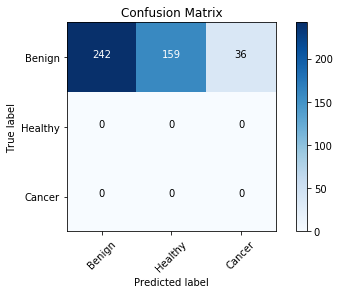

In [0]:
!pip3 install -U scikit-learn
from sklearn.metrics import confusion_matrix
#test_imgs, test_labels = next(test_batches)
test_labels=test_batches.classes

#MULTI-LABEL CONFUSION MATRIX

y_test_non_category = [ np.argmax(t) for t in test_labels ]
#y_test_non_category = np.argmax(test_labels, axis=-1) #multiple categories
y_predict_non_category = [ np.argmax(t) for t in predictions ]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)

cm_plot_labels = ['Benign','Healthy','Cancer']
plot_confusion_matrix(conf_mat,cm_plot_labels,normalize=False,title ='Confusion Matrix')

**ANOTHER WAY TO PREDICT AND PLOT THE CONFUSION MATRIX**

In [0]:
#from keras.models import load_model
#model = load_model('/content/gdrive/My Drive/Bioinformatica/FirstVGG16.h5')

generator = ImageDataGenerator().flow_from_directory(
        '/content/gdrive/My Drive/Bioinformatica/Organized dataset/Test/Patches',
        target_size=(224, 224),
        batch_size=200)

probabilities = model.predict_generator(generator, 1)
#probabilities = np.argmax(probabilities, axis=-1) #multiple categories

Found 437 images belonging to 3 classes.


Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.3)
Normalized confusion matrix
[[0.58461538 0.32307692 0.09230769]
 [0.59722222 0.34722222 0.05555556]
 [0.53968254 0.33333333 0.12698413]]


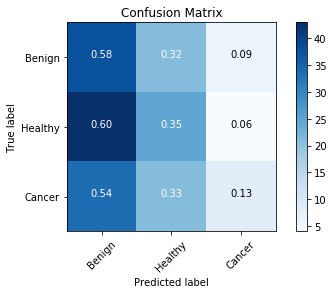

In [0]:
!pip3 install -U scikit-learn
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(test_labels, predictions)

#MULTI-LABEL CONFUSION MATRIX
test_dir, test_labels = next(generator)
test_img = [ np.argmax(t) for t in test_labels ]
predicted_img = [ np.argmax(t) for t in probabilities ]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_img, predicted_img)

cm_plot_labels = ['Benign','Healthy','Cancer']
plot_confusion_matrix(conf_mat,cm_plot_labels,normalize=True,title ='Confusion Matrix')

**QUESTA DOVREBBE ESSERE LA FINE DELLA PRIMA PARTE DI TEST, SE FIN QUI I RISULTATI SONO BUONI, POSSIAMO FERMARCI SE NO BISOGNA FARE DATA AUGMENTATION E AUMENTARE LE EPOCHS**

In [0]:
#DATA AUGMENATION

#NOTE: every time this script is run, image crops will augment of a 6 factor

gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, channel_shift_range=10., horizontal_flip=True)

path="/content/gdrive/My Drive/Bioinformatica/Patches"

folders = [path + "/Healthy", path + "/Benign", path + "/Cancer"]
for folder in folders:                                          #loops through the three folders of patches
   for filename in glob.glob(os.path.join(folder, '*.png')):   #sequentially selects each .png file in the current folder
      print(filename)
      image = np.expand_dims(ndimage.imread(filename),0)
      aug_iter = gen.flow(image)
      aug_image = [next(aug_iter)[0].astype(np.uint8) for i in range(6)]  #get 6 samples of augmented images
      for i in range(len(aug_image)):                                     #save all the generated images
        scipy.misc.imsave(filename[:-4] + str(i) + '.png', aug_image[0])

In [0]:
plots(aug_images, figsize=(20,7), rows=2)

**SE I RISULTATI OTTENUTI CON UN DETERMINATO SET DI IMPOSTAZIONI SONO BUONI E VOGLIAMO FREEZZARLI E RIPRODURLI ...**

In [0]:
import numpy as np
import tensorflow as tf
import random as rn
import os
os.environ['PYTHONHASHSEED'] = '0'

#Setting the seed for numpy-generated random numbers
np.random.seed(37)

#Setting the seed for Python random numbers
rn.seed(1254)

#Setting the seed for Tensorflow random numbers
tf.set_random_seed(89)

from keras import backend as K

#Force TensorFlow to use a single thread
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

#Paste training Keras code here after setting the random seeds

 **CLASS ACTIVION MAP**

In [0]:
# --- CLASS ACTIVATION MAP --- #
from keras.models import *
from keras.callbacks import *
import keras.backend as K
#from model import *
#from data import *
import cv2

#After the last convolutional layer in a typical network like VGG16, we have an N-dimensional image, where N is the number of filters in this layer. 
#For example in VGG16, the last convolutional layer has 512 filters. For example, for an 1024x1024 input image (lets discard the fully connected layers, 
#so we can use any input image size we want), the output shape of the last convolutional layer will be 512x64x64. 
#Since 1024/64 = 16, we have a 16x16 spatial mapping resolution. 
#A global average pooling (GAP) layer just takes each of these 512 channels, and returns their spatial average. 
#Channels with high activations, will have high signals.

def global_average_pooling(x):
        return K.mean(x, axis = (2, 3))
  

def global_average_pooling_shape(input_shape):
        return input_shape[0:2]
  
#The second step is to assign a weight to each output from the global average pooling layer, for each of the categories. 
#This can be done by adding a dense linear layer + softmax, training an SVM on the GAP output, or applying any other linear classifier on top of the GAP. 
#These weights set the importance of each of the convolutional layer outputs.


#TO DO: 
#    --- definire una funzione che crei il modello VGG16 (ho visto che Elena ha creato il modello ma non dentro una funzione)
def get_model():
	    model = VGG16_convolutions()
	    model = load_model_weights(model, "vgg16_weights.h5")
	    
	    model.add(Lambda(global_average_pooling, 
	              output_shape=global_average_pooling_shape))
	    model.add(Dense(2, activation = 'softmax', init='uniform'))
	    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.5, nesterov=True)
	    model.compile(loss = 'categorical_crossentropy', \
            optimizer = sgd, metrics=['accuracy'])
	    return model

def load_model_weights(model, weights_path):
    print ('Loading model.')
    f = h5py.File(weights_path)
    for k in range(f.attrs['nb_layers']):
        if k >= len(model.layers):
            # we don't look at the last (fully-connected) layers in the savefile
            break
        g = f['layer_{}'.format(k)]
        weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
        model.layers[k].set_weights(weights)
        model.layers[k].trainable = False
    f.close()
    print ('Model loaded.')
    return model

def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer = layer_dict[layer_name]
    return layer    
       
#TO DO: 
# --- definire il "dataset_path"
# --- definire la funzione "load_images": è necessario creare due path diversi, uno per immagini positive e l'altro per quelle negative
#     (poi la faccio io appena riusciamo a fare i test)

def train(dataset_path):
        model = get_model()
        X, y = load_images(dataset_path)
	      #print ('Training')
        checkpoint_path="weights.{epoch:02d}-{val_loss:.2f}.hdf5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto')
        model.fit(X, y, nb_epoch=40, batch_size=32, validation_split=0.2, verbose=1, callbacks=[checkpoint])

#Now to create a heatmap for a class we can just take output images from the last convolutional layer, multiply them by their assigned weights 
#(different weights for each class), and sum.

def visualize_class_activation_map(model_path, img_path, output_path):
        model = load_model(model_path)
        original_img = cv2.imread(img_path, 1)
        width, height, _ = original_img.shape

        #Reshape to the network input shape (3, w, h).
        img = np.array([np.transpose(np.float32(original_img), (2, 0, 1))])
        
        #Get the 512 input weights to the softmax.
        class_weights = model.layers[-1].get_weights()[0]
        final_conv_layer = get_output_layer(model, "conv5_3")
        get_output = K.function([model.layers[0].input], \
                    [final_conv_layer.output, 
        model.layers[-1].output])
        [conv_outputs, predictions] = get_output([img])
        conv_outputs = conv_outputs[0, :, :, :]

        #Create the class activation map.
        cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[1:3])
        target_class = 1
        for i, w in enumerate(class_weights[:, target_class]):
                cam += w * conv_outputs[i, :, :]
        print ("predictions"), predictions
        cam /= np.max(cam)
        cam = cv2.resize(cam, (height, width))
        heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
        heatmap[np.where(cam < 0.2)] = 0
        img = heatmap*0.5 + original_img
        cv2.imwrite(output_path, img)

**ANOTHER FINE TUNING OF VGG16**

In [20]:
#NEW VGG16 TUNING

import numpy as np
!pip3 install keras
#!pip3 install tensorflow==1.5.0
!pip3 install tensorflow
!pip install mxnet-mkl
!pip3 install sklearn
!pip3 install keras_tqdm
!pip install scipy
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import *
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

#VGG19 at the moment, change here for using the VGG16
#from keras.applications import VGG19
from keras.applications import VGG16
#Load the VGG model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))



# Freeze the layers except the last 4 layers
for layer in vgg16_model.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg16_model.layers:
    print(layer, layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x7f86c210c5c0> False
<keras.layers.convolutional.Conv2D object at 0x7f88cf7837f0> False
<keras.layers.convolutional.Conv2D object at 0x7f88cf7fb588> False
<keras.layers.pooling.MaxPooling2D object at 0x7f88cf78ddd8> False
<keras.layers.convolutional.Conv2D object at 0x7f88cf7a62b0> False
<keras.layers.convolutional.Conv2D object at 0x7f88cf73ef60> False
<keras.layers.pooling.MaxPooling2D object at 0x7f88cf7686d8> False
<keras.layers.convolutional.Conv2D object at 0x7f88cf768208> False
<keras.layers.convolutional.Conv2D object at 0x7f88cf716390> False
<keras.layers.convolutional.Conv2D object at 0x7f88cf72b9b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f88cf6c7fd0> False
<keras.layers.convolutional.Conv2D object at 0x7f88cf6c79e8> False
<keras.layers.convolutional.Conv2D object at 0x7f88cf6f3c88> False
<keras.layers.convolutional.Conv2D object at 0x7f88cf68bf28> False
<keras.layers.pooling.MaxPooling2D object at 0x7f88cf6b8c88>

In [21]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
newVGG16_model = models.Sequential()
 
# Add the vgg convolutional base model
newVGG16_model.add(vgg16_model)
 
# Add new layers
newVGG16_model.add(Flatten())
newVGG16_model.add(Dense(1024))
newVGG16_model.add(BatchNormalization())
newVGG16_model.add(Activation('relu'))
newVGG16_model.add(Dropout(0.5))

newVGG16_model.add(Dense(512))
newVGG16_model.add(BatchNormalization())
newVGG16_model.add(Activation('relu'))
newVGG16_model.add(Dropout(0.5))

newVGG16_model.add(Dense(64))
newVGG16_model.add(BatchNormalization())
newVGG16_model.add(Activation('relu'))
newVGG16_model.add(Dropout(0.5))

newVGG16_model.add(Dense(3))
newVGG16_model.add(BatchNormalization())
newVGG16_model.add(Activation('softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
newVGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_9 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_9 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
__________

In [22]:
train_path="/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Training/Patches"
#train_path="/Users/Mac/Desktop/ROI-dataset-bioinf/Training/Patches/"
valid_path="/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Validation/Patches"
#valid_path="/Users/Mac/Desktop/ROI-dataset-bioinf/Validation/Patches"
#test_path ="/Users/Mac/Desktop/ROI-dataset-bioinf/Test/Patches"
test_path="/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Test/Patches"

#test with augmentation on the fly

train_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=10,
      #width_shift_range=0.1, #tolgo per ottenere migliori risultati
      #height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='reflect')


validation_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=10,
      #width_shift_range=0.1, #tolgo per ottenere migliori risultati
      #height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='reflect')


#test with no augmentation on the fly
#train_datagen = ImageDataGenerator()
#validation_datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb')

validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size=(64, 64),
    batch_size= 32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False)

Found 2553 images belonging to 3 classes.
Found 1197 images belonging to 3 classes.


In [23]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

# Compile the model
newVGG16_model.compile(loss='categorical_crossentropy',optimizer=
              keras.optimizers.SGD(lr=0.0001, momentum=0.9, decay=1e-6, nesterov=True),
              metrics=['accuracy'])
# Train the model
history = newVGG16_model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size, verbose=1, callbacks=[es])

def printGraph(history):
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
 
# Save the model
#newVGG16_model.save('/content/gdrive/My Drive/Bioinformatica/VGG16noaugtry.h5')
newVGG16_model.save('/content/gdrive/My Drive/Bioinformatica/balancedtrain_VGG16.h5')

Epoch 1/100
80/79 [==============================] - 11s 140ms/step - loss: 1.1893 - acc: 0.4314 - val_loss: 0.8316 - val_acc: 0.7377
Epoch 2/100
80/79 [==============================] - 9s 112ms/step - loss: 0.8652 - acc: 0.6059 - val_loss: 0.6981 - val_acc: 0.8037
Epoch 3/100
80/79 [==============================] - 9s 112ms/step - loss: 0.7369 - acc: 0.7035 - val_loss: 0.6505 - val_acc: 0.8079
Epoch 4/100
80/79 [==============================] - 9s 112ms/step - loss: 0.6440 - acc: 0.7714 - val_loss: 0.6075 - val_acc: 0.8212
Epoch 5/100
80/79 [==============================] - 9s 111ms/step - loss: 0.6174 - acc: 0.7937 - val_loss: 0.5886 - val_acc: 0.8446
Epoch 6/100
80/79 [==============================] - 9s 111ms/step - loss: 0.5801 - acc: 0.8161 - val_loss: 0.5784 - val_acc: 0.8454
Epoch 7/100
80/79 [==============================] - 9s 111ms/step - loss: 0.5584 - acc: 0.8321 - val_loss: 0.5670 - val_acc: 0.8438
Epoch 8/100
80/79 [==============================] - 9s 110ms/step -

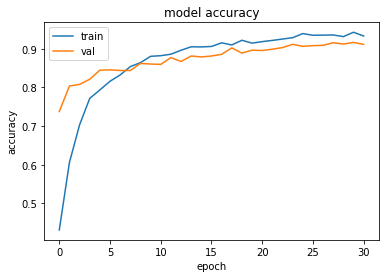

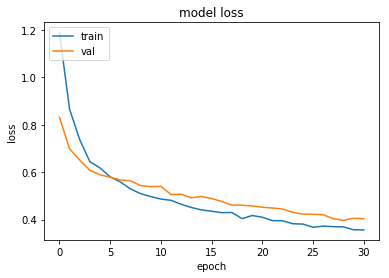

Found 429 images belonging to 3 classes.


In [24]:
#from keras.models import load_model
#newVGG16 = load_model('/content/gdrive/My Drive/Bioinformatica/newVGG16.h5')
#newVGG16_model = load_model('/content/gdrive/My Drive/Bioinformatica/augtrain_VGG19.h5')

printGraph(history)

generator = ImageDataGenerator().flow_from_directory(
        test_path,
        target_size=(64, 64),
        batch_size=429, class_mode='categorical', shuffle = False)

probabilities = newVGG16_model.predict_generator(generator, 1)
#probabilities = np.argmax(probabilities, axis=-1) #multiple categories

In [0]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):

#This function prints and plots the confusion matrix.
#Normalization can ben applied by setting 'normalize-True'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
           plt.text(j, i, "{:0.2f}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
        else:
           plt.text(j, i, format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.2)
Normalized confusion matrix
[[0.88194444 0.11805556 0.        ]
 [0.02898551 0.97101449 0.        ]
 [0.02040816 0.06802721 0.91156463]]


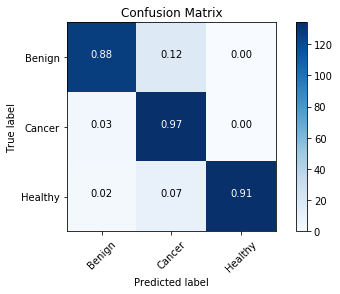

In [26]:
!pip3 install -U scikit-learn
from sklearn.metrics import confusion_matrix

#MULTI-LABEL CONFUSION MATRIX
test_dir, test_labels = next(generator)
test_img = [ np.argmax(t) for t in test_labels ]
num_pred = [ np.argmax(t) for t in probabilities ]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_img, num_pred)

cm_plot_labels = ['Benign','Cancer','Healthy']
plot_confusion_matrix(conf_mat,cm_plot_labels,normalize=True,title ='Confusion Matrix')

**FINE TUNING RESNET50**

In [1]:
!pip install keras
!pip install h5py
!pip3 install tensorflow
!pip install mxnet-mkl
!pip3 install sklearn
!pip3 install keras_tqdm
!pip install scipy
!pip install -U --force-reinstall --no-dependencies git+https://github.com/datumbox/keras@bugfix/trainable_bn
#http://blog.datumbox.com/the-batch-normalization-layer-of-keras-is-broken/

!pip install -U coremltools

from keras.applications.resnet50 import ResNet50
from keras.models import Model,load_model, Sequential
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adadelta, SGD
from keras import regularizers
import keras
import h5py
import math, os, sys
import matplotlib.pyplot as plt
import coremltools
import numpy as np
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import *
import itertools
%matplotlib inline





  Cloning https://github.com/datumbox/keras (to revision bugfix/trainable_bn) to /tmp/pip-req-build-bwk3ltxp
  Running command git clone -q https://github.com/datumbox/keras /tmp/pip-req-build-bwk3ltxp
  Running command git checkout -b bugfix/trainable_bn --track origin/bugfix/trainable_bn
  Switched to a new branch 'bugfix/trainable_bn'
  Branch 'bugfix/trainable_bn' set up to track remote branch 'bugfix/trainable_bn' from 'origin'.
  Stored in directory: /tmp/pip-ephem-wheel-cache-9eryf4q8/wheels/36/5d/50/99c268bf64c1394c4f5b743164e4e515ab30290a523595ac47
Successfully built Keras
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4
Requirement already up-to-date: coremltools in /usr/local/lib/python3.6/dist-packages (2.1.0)


Using TensorFlow backend.


In [2]:
def get_model():
  
    input_tensor = Input(shape=(64, 64, 3))  # this assumes K.image_data_format() == 'channels_last'

    # create the base pre-trained model
    base_model = ResNet50(input_tensor=input_tensor,weights='imagenet',include_top=False)

    for layer in base_model.layers:
        layer.trainable=False
        
    customResnet50 = Sequential()
    customResnet50.add(base_model)
    
    customResnet50.add(Flatten())
    customResnet50.add(Dense(1024))
    customResnet50.add(BatchNormalization())
    customResnet50.add(Activation('relu'))
    customResnet50.add(Dropout(0.5))

    customResnet50.add(Dense(512))
    customResnet50.add(BatchNormalization())
    customResnet50.add(Activation('relu'))
    customResnet50.add(Dropout(0.5))

    customResnet50.add(Dense(64))
    customResnet50.add(BatchNormalization())
    customResnet50.add(Activation('relu'))
    customResnet50.add(Dropout(0.5))

    customResnet50.add(Dense(3))
    customResnet50.add(BatchNormalization())
    customResnet50.add(Activation('softmax'))
    
    customResnet50.summary()
    
    return customResnet50
    
    '''
    x = base_model.output
    #x = GlobalAveragePooling2D(data_format='channels_last')(x)
    #x = Dense(num_classes, activation='softmax')(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x) #changed from 1024 to 512
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)
    #kernel_regularizer=regularizers.l2(0.01),
    #activity_regularizer=regularizers.l1(0.01)

    updatedModel = Model(base_model.input, x)

    return  updatedModel '''



def compile_model(compiledModel):
    #I tried SGD compiler instead of Adadelta
    compiledModel.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True),
                  metrics=['accuracy'])


def modelFitGenerator(fitModel):

    num_train_samples = sum([len(files) for r, d, files in os.walk(train_data_dir)])
    num_valid_samples = sum([len(files) for r, d, files in os.walk(validation_data_dir)])

    num_train_steps = math.floor(num_train_samples/batch_size)
    num_valid_steps = math.floor(num_valid_samples/batch_size)
    
    
    train_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=10,
      #width_shift_range=0.1, #tolgo per ottenere migliori risultati
      #height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='reflect')

    valid_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=10,
      #width_shift_range=0.1, #tolgo per ottenere migliori risultati
      #height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='reflect')

    train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=image_size ,
      batch_size=batch_size,
      class_mode='categorical', color_mode='rgb', shuffle=True
    )

    validation_generator = valid_datagen.flow_from_directory(
      validation_data_dir,
      target_size=image_size ,
      batch_size=batch_size,
      class_mode='categorical', color_mode='rgb', shuffle=False
    )

    es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')
    
    print("start history model")
    history = fitModel.fit_generator(
      train_generator,
      steps_per_epoch=num_train_steps,
      epochs=nb_epoch,
      validation_data=validation_generator,
      validation_steps=num_valid_steps, verbose=1, callbacks=[es])
    
    printGraph(history)

def printGraph(history):
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
def saveCoreMLModel(kerasModel):
    coreml_model = coremltools.converters.keras.convert(kerasModel,
                                                        input_names=['input'],
                                                        output_names=['probs'],
                                                        image_input_names='input',
                                                        predicted_feature_name='predictedTumor',
                                                        class_labels = ['Benign', 'Cancer', 'Healthy'])
    #coreml_model.save('resnet50custom.mlmodel')
    #kerasModel.save('resnet50.h5')
    coreml_model.save('/content/gdrive/My Drive/Bioinformatica/balancedtrain_resnet50.mlmodel')
    kerasModel.save('/content/gdrive/My Drive/Bioinformatica/balancedtrain_resnet50.h5')
    print('CoreML model saved')
        
def plot_confusion_matrix(cm,classes,normalize,title='Confusion matrix', cmap=plt.cm.Blues):

    #This function prints and plots the confusion matrix.
    #Normalization can ben applied by setting 'normalize-True'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

        print(cm)

    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
           plt.text(j, i, "{:0.2f}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
        else:
           plt.text(j, i, format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
def print_predictions(model):
        
    test_generator = ImageDataGenerator().flow_from_directory(
        '/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Test/Patches',
        target_size=(64, 64),
        batch_size=437, class_mode='categorical', shuffle=False)

    probabilities = model.predict_generator(test_generator, 1)

    !pip3 install -U scikit-learn
    from sklearn.metrics import confusion_matrix

    #MULTI-LABEL CONFUSION MATRIX
    test_dir, test_labels = next(test_generator)
    test_img = [ np.argmax(t) for t in test_labels ]
    num_pred = [ np.argmax(t) for t in probabilities ]

    from sklearn.metrics import confusion_matrix
    conf_mat = confusion_matrix(test_img, num_pred)

    cm_plot_labels = ['Benign','Cancer','Healthy']
    plot_confusion_matrix(conf_mat,cm_plot_labels, normalize=True ,title ='Confusion Matrix')

'''
def main():
    ResNetModel = get_model()
    compile_model(ResNetModel)
    modelFitGenerator(ResNetModel)
    #saveCoreMLModel(ResNetModel)
    print_predictions(ResNetModel)
    

if __name__ == '__main__':
    # constants
    image_size = (224, 224)
    train_data_dir = '/content/gdrive/My Drive/Bioinformatica/Organized dataset/Training/Patches' 
    validation_data_dir = '/content/gdrive/My Drive/Bioinformatica/Organized dataset/Validation/Patches'
    nb_epoch = 30
    batch_size = 32
    num_classes = 3
    main()
'''

"\ndef main():\n    ResNetModel = get_model()\n    compile_model(ResNetModel)\n    modelFitGenerator(ResNetModel)\n    #saveCoreMLModel(ResNetModel)\n    print_predictions(ResNetModel)\n    \n\nif __name__ == '__main__':\n    # constants\n    image_size = (224, 224)\n    train_data_dir = '/content/gdrive/My Drive/Bioinformatica/Organized dataset/Training/Patches' \n    validation_data_dir = '/content/gdrive/My Drive/Bioinformatica/Organized dataset/Validation/Patches'\n    nb_epoch = 30\n    batch_size = 32\n    num_classes = 3\n    main()\n"

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.
/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_50 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
__________

Instructions for updating:
Use tf.cast instead.


Epoch 1/100
80/80 [==============================] - 16s 203ms/step - loss: 0.8001 - acc: 0.6567 - val_loss: 0.5878 - val_acc: 0.8074
Epoch 2/100
80/80 [==============================] - 10s 120ms/step - loss: 0.5775 - acc: 0.8077 - val_loss: 0.5466 - val_acc: 0.8421
Epoch 3/100
80/80 [==============================] - 9s 119ms/step - loss: 0.5096 - acc: 0.8460 - val_loss: 0.5168 - val_acc: 0.8481
Epoch 4/100
80/80 [==============================] - 9s 119ms/step - loss: 0.4611 - acc: 0.8692 - val_loss: 0.5142 - val_acc: 0.8258
Epoch 5/100
80/80 [==============================] - 10s 119ms/step - loss: 0.4256 - acc: 0.8834 - val_loss: 0.5054 - val_acc: 0.8258
Epoch 6/100
80/80 [==============================] - 10s 119ms/step - loss: 0.4069 - acc: 0.8862 - val_loss: 0.4903 - val_acc: 0.8326
Epoch 7/100
80/80 [==============================] - 10s 120ms/step - loss: 0.3867 - acc: 0.9007 - val_loss: 0.4740 - val_acc: 0.8369
Epoch 8/100
80/80 [==============================] - 10s 120ms/s

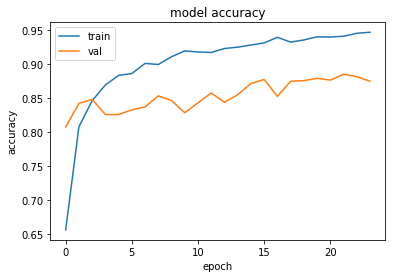

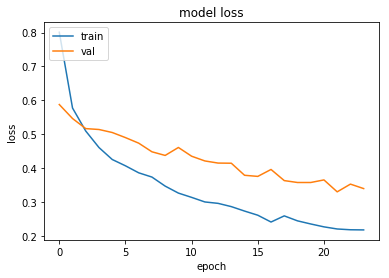

0 : resnet50_input, <keras.engine.input_layer.InputLayer object at 0x7fb00163afd0>
1 : resnet50_conv1_pad, <keras.layers.convolutional.ZeroPadding2D object at 0x7fb08fa93588>
2 : resnet50_conv1, <keras.layers.convolutional.Conv2D object at 0x7fb08fa936d8>
3 : resnet50_bn_conv1, <keras.layers.normalization.BatchNormalization object at 0x7fb08faf4be0>
4 : resnet50_activation_1, <keras.layers.core.Activation object at 0x7fb08faf4d68>
5 : resnet50_pool1_pad, <keras.layers.convolutional.ZeroPadding2D object at 0x7fb03226def0>
6 : resnet50_max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x7fb03226deb8>
7 : resnet50_res2a_branch2a, <keras.layers.convolutional.Conv2D object at 0x7fb03221d518>
8 : resnet50_bn2a_branch2a, <keras.layers.normalization.BatchNormalization object at 0x7fb0260c9160>
9 : resnet50_activation_2, <keras.layers.core.Activation object at 0x7fb0260c9b38>
10 : resnet50_res2a_branch2b, <keras.layers.convolutional.Conv2D object at 0x7fb026091748>
11 : resnet50_bn2

FileNotFoundError: ignored

In [3]:
    image_size = (64, 64)
    train_data_dir = '/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Training/Patches' 
    validation_data_dir = '/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Validation/Patches'
    nb_epoch = 100
    batch_size = 32
    num_classes = 3
    ResNet50Model = get_model()
    compile_model(ResNet50Model)
    modelFitGenerator(ResNet50Model)
    saveCoreMLModel(ResNet50Model)
    print_predictions(ResNet50Model)

Found 429 images belonging to 3 classes.
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.2)
Normalized confusion matrix


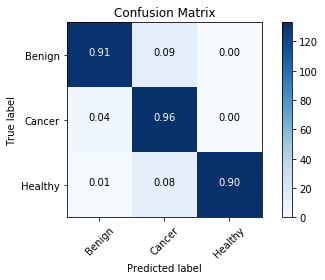

In [8]:
test_generator = ImageDataGenerator().flow_from_directory(
        '/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Test/Patches',
        target_size=(64, 64),
        batch_size=429, class_mode='categorical', shuffle=False)

probabilities = ResNet50Model.predict_generator(test_generator, 1)

!pip3 install -U scikit-learn
from sklearn.metrics import confusion_matrix

#MULTI-LABEL CONFUSION MATRIX
test_dir, test_labels = next(test_generator)
test_img = [ np.argmax(t) for t in test_labels ]
num_pred = [ np.argmax(t) for t in probabilities ]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_img, num_pred)

cm_plot_labels = ['Benign','Cancer','Healthy']
plot_confusion_matrix(conf_mat,cm_plot_labels, normalize=True ,title ='Confusion Matrix')

**FINE TUNING OF RESNET18**

  Cloning https://github.com/datumbox/keras (to revision bugfix/trainable_bn) to /tmp/pip-req-build-8l0isov5
  Running command git clone -q https://github.com/datumbox/keras /tmp/pip-req-build-8l0isov5
  Running command git checkout -b bugfix/trainable_bn --track origin/bugfix/trainable_bn
  Switched to a new branch 'bugfix/trainable_bn'
  Branch 'bugfix/trainable_bn' set up to track remote branch 'bugfix/trainable_bn' from 'origin'.
  Stored in directory: /tmp/pip-ephem-wheel-cache-zh9_otxz/wheels/36/5d/50/99c268bf64c1394c4f5b743164e4e515ab30290a523595ac47
Successfully built Keras
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-dc6gnzy3
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-dc6gnzy3
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pi

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet18 (Model)             (None, 2, 2, 512)         11186889  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
__________

Instructions for updating:
Use tf.cast instead.


Epoch 1/100
25/25 [==============================] - 11s 434ms/step - loss: 1.1305 - acc: 0.4476 - val_loss: 0.8442 - val_acc: 0.6767
Epoch 2/100
25/25 [==============================] - 7s 290ms/step - loss: 0.8177 - acc: 0.6429 - val_loss: 0.7299 - val_acc: 0.7686
Epoch 3/100
25/25 [==============================] - 8s 311ms/step - loss: 0.7235 - acc: 0.7117 - val_loss: 0.6879 - val_acc: 0.7686
Epoch 4/100
25/25 [==============================] - 8s 305ms/step - loss: 0.6493 - acc: 0.7536 - val_loss: 0.6579 - val_acc: 0.7828
Epoch 5/100
25/25 [==============================] - 8s 308ms/step - loss: 0.6307 - acc: 0.7843 - val_loss: 0.6601 - val_acc: 0.7661
Epoch 6/100
25/25 [==============================] - 8s 306ms/step - loss: 0.5936 - acc: 0.8009 - val_loss: 0.6536 - val_acc: 0.7619
Epoch 7/100
25/25 [==============================] - 8s 308ms/step - loss: 0.5779 - acc: 0.8158 - val_loss: 0.6264 - val_acc: 0.7753
Epoch 8/100
25/25 [==============================] - 8s 307ms/step -

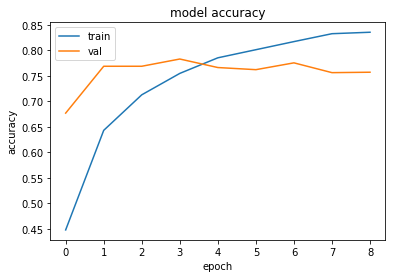

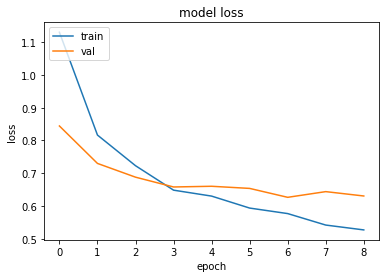

0 : resnet18_input, <keras.engine.input_layer.InputLayer object at 0x7f968ce272e8>
1 : resnet18_bn_data, <keras.layers.normalization.BatchNormalization object at 0x7f96ba6eaa20>
2 : resnet18_zero_padding2d_1, <keras.layers.convolutional.ZeroPadding2D object at 0x7f96ba6ea940>
3 : resnet18_conv0, <keras.layers.convolutional.Conv2D object at 0x7f96ba659390>
4 : resnet18_bn0, <keras.layers.normalization.BatchNormalization object at 0x7f96b058df28>
5 : resnet18_relu0, <keras.layers.core.Activation object at 0x7f96b05aef28>
6 : resnet18_zero_padding2d_2, <keras.layers.convolutional.ZeroPadding2D object at 0x7f96b05765c0>
7 : resnet18_pooling0, <keras.layers.pooling.MaxPooling2D object at 0x7f96b0511e48>
8 : resnet18_stage1_unit1_bn1, <keras.layers.normalization.BatchNormalization object at 0x7f96b05ae390>
9 : resnet18_stage1_unit1_relu1, <keras.layers.core.Activation object at 0x7f96b049c8d0>
10 : resnet18_zero_padding2d_3, <keras.layers.convolutional.ZeroPadding2D object at 0x7f96b0433ba8>

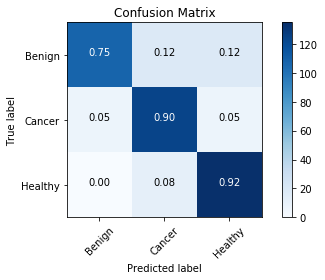

In [1]:
!pip install keras
!pip install h5py
!pip3 install tensorflow
!pip install mxnet-mkl
!pip3 install sklearn
!pip3 install keras_tqdm
!pip install scipy
!pip install -U --force-reinstall --no-dependencies git+https://github.com/datumbox/keras@bugfix/trainable_bn
#http://blog.datumbox.com/the-batch-normalization-layer-of-keras-is-broken/
!pip install git+https://github.com/qubvel/classification_models.git
!pip install -U coremltools

from classification_models.resnet import ResNet18
from keras.models import Model,load_model, Sequential
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adadelta, SGD
from keras import regularizers
import keras
import h5py
import math, os, sys
import matplotlib.pyplot as plt
import coremltools
import numpy as np
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import *
import itertools
%matplotlib inline

def get_model():

    # create the base pre-trained model
    base_model = ResNet18(input_shape=(64,64,3),weights='imagenet',include_top=False)

    for layer in base_model.layers:
        layer.trainable=False
        
    customResnet18 = Sequential()
    customResnet18.add(base_model)
    
    customResnet18.add(Flatten())
    customResnet18.add(Dense(1024))
    customResnet18.add(BatchNormalization())
    customResnet18.add(Activation('relu'))
    customResnet18.add(Dropout(0.5))

    customResnet18.add(Dense(512))
    customResnet18.add(BatchNormalization())
    customResnet18.add(Activation('relu'))
    customResnet18.add(Dropout(0.5))

    customResnet18.add(Dense(64))
    customResnet18.add(BatchNormalization())
    customResnet18.add(Activation('relu'))
    customResnet18.add(Dropout(0.5))

    customResnet18.add(Dense(3))
    customResnet18.add(BatchNormalization())
    customResnet18.add(Activation('softmax'))
    
    customResnet18.summary()
    
    return customResnet18


def compile_model(compiledModel):
    #I tried SGD compiler instead of Adadelta
    compiledModel.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True),
                  metrics=['accuracy'])


def modelFitGenerator(fitModel):

    num_train_samples = sum([len(files) for r, d, files in os.walk(train_data_dir)])
    num_valid_samples = sum([len(files) for r, d, files in os.walk(validation_data_dir)])

    num_train_steps = math.floor(num_train_samples/batch_size)
    num_valid_steps = math.floor(num_valid_samples/batch_size)
    
    
    train_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=10,
      #width_shift_range=0.1, #tolgo per ottenere migliori risultati
      #height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='reflect')

    valid_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=10,
      #width_shift_range=0.1, #tolgo per ottenere migliori risultati
      #height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='reflect')

    train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=image_size ,
      batch_size=batch_size,
      class_mode='categorical', color_mode='rgb', shuffle=True
    )

    validation_generator = valid_datagen.flow_from_directory(
      validation_data_dir,
      target_size=image_size ,
      batch_size=batch_size,
      class_mode='categorical', color_mode='rgb', shuffle=False
    )

    es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')
    
    print("start history model")
    history = fitModel.fit_generator(
      train_generator,
      steps_per_epoch=num_train_steps,
      epochs=nb_epoch,
      validation_data=validation_generator,
      validation_steps=num_valid_steps, verbose=1, callbacks=[es])
    
    printGraph(history)

def printGraph(history):
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
def saveCoreMLModel(kerasModel):
    coreml_model = coremltools.converters.keras.convert(kerasModel,
                                                        input_names=['input'],
                                                        output_names=['probs'],
                                                        image_input_names='input',
                                                        predicted_feature_name='predictedTumor',
                                                        class_labels = ['Benign', 'Cancer', 'Healthy'])
    #coreml_model.save('resnet18custom.mlmodel')
    #kerasModel.save('resnet18.h5')
    coreml_model.save('/content/gdrive/My Drive/Bioinformatica/balancedtrain_resnet18.mlmodel')
    kerasModel.save('/content/gdrive/My Drive/Bioinformatica/balancedtrain_resnet18.h5')
    print('CoreML model saved')
        
def plot_confusion_matrix(cm,classes,normalize,title='Confusion matrix', cmap=plt.cm.Blues):

    #This function prints and plots the confusion matrix.
    #Normalization can ben applied by setting 'normalize-True'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

        print(cm)

    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
           plt.text(j, i, "{:0.2f}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
        else:
           plt.text(j, i, format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
def print_predictions(model):
        
    test_generator = ImageDataGenerator().flow_from_directory(
        '/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Test/Patches',
        target_size=(64, 64),
        batch_size=429, class_mode='categorical', shuffle=False)

    probabilities = model.predict_generator(test_generator, 1)

    !pip3 install -U scikit-learn
    from sklearn.metrics import confusion_matrix

    #MULTI-LABEL CONFUSION MATRIX
    test_dir, test_labels = next(test_generator)
    test_img = [ np.argmax(t) for t in test_labels ]
    num_pred = [ np.argmax(t) for t in probabilities ]

    from sklearn.metrics import confusion_matrix
    conf_mat = confusion_matrix(test_img, num_pred)

    cm_plot_labels = ['Benign','Cancer','Healthy']
    plot_confusion_matrix(conf_mat,cm_plot_labels, normalize=True ,title ='Confusion Matrix')
    
    
image_size = (64, 64)
train_data_dir = '/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Training/Patches' 
validation_data_dir = '/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Validation/Patches'
nb_epoch = 100
batch_size = 100
num_classes = 3
ResNet18Model = get_model()
compile_model(ResNet18Model)
modelFitGenerator(ResNet18Model)
saveCoreMLModel(ResNet18Model)
print_predictions(ResNet18Model)

**VGG16 FROM GITHUB** https://github.com/flyyufelix/cnn_finetune/blob/master/vgg16.py

In [0]:

from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation

from sklearn.metrics import log_loss


def vgg16_model(img_rows, img_cols, channel=1, num_classes=None):
    """VGG 16 Model for Keras
    Model Schema is based on 
    https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3
    ImageNet Pretrained Weights 
    https://drive.google.com/file/d/0Bz7KyqmuGsilT0J5dmRCM0ROVHc/view?usp=sharing
    Parameters:
      img_rows, img_cols - resolution of inputs
      channel - 1 for grayscale, 3 for color 
      num_classes - number of categories for our classification task
    """
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(img_rows, img_cols, channel)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), dim_ordering="th"))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), dim_ordering="th"))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), dim_ordering="th"))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), dim_ordering="th"))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), dim_ordering="th"))

    # Add Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    # Truncate and replace softmax layer for transfer learning
    model.layers.pop()
    model.outputs = [model.layers[-1].output]
    model.layers[-1].outbound_nodes = []
    model.add(Dense(num_classes, activation='softmax'))

    # Uncomment below to set the first 10 layers to non-trainable (weights will not be updated)
    for layer in model.layers[:10]:
        layer.trainable = False
        
    # Loads ImageNet pre-trained data
    weights_model='/content/gdrive/My Drive/Bioinformatica/vgg16_weights.h5'
    model.load_weights(weights_model, by_name=True)

    # Learning rate is changed to 0.001
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_path="/content/gdrive/My Drive/Bioinformatica/Organized dataset/Training/Patches"
valid_path="/content/gdrive/My Drive/Bioinformatica/Organized dataset/Validation/Patches"
test_path="/content/gdrive/My Drive/Bioinformatica/Organized dataset/Test/Patches" 
  
modelX = vgg16_model(224, 224, 3, 3)

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['Benign', 'Healthy', 'Cancer'], batch_size=32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['Benign', 'Healthy', 'Cancer'], batch_size=32)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['Benign', 'Healthy', 'Cancer'], batch_size=32)
  
# Start Fine-tuning
modelX.fit_generator(train_batches,
                    steps_per_epoch=train_batches.samples/train_batches.batch_size ,
                    epochs=15,
                    validation_data=valid_batches,
                    validation_steps=valid_batches.samples/valid_batches.batch_size,
                    verbose=1)

In [0]:
#PROVA PER LEGGERE E SALVARE IN PNG LA MAP ... FUNZIONA ANCHE SE NON è ALLA MASSIMA DIMENSIONE

!apt install openslide-tools
!pip install openslide-python
import cv2
from PIL import Image
import openslide

slide = openslide.OpenSlide('/content/gdrive/My Drive/Bioinformatica/map_1.svs')

print("total image size: x=%d y=%d" % slide.dimensions)



# read_region return an RGBA image containing the content of the specified region.

img = slide.read_region((255,255), slide.level_count-1, (5000, 5000)) # ((x,y) = start region, 0 = level, (x,y) = size)
img.save('/content/gdrive/My Drive/Bioinformatica/TestMap.png',format='png')


Reading package lists... Done
Building dependency tree       
Reading state information... Done
openslide-tools is already the newest version (3.4.1+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
total image size: x=41000 y=25000


In [0]:
visualize_class_activation_map('/content/gdrive/My Drive/Bioinformatica/newVGG16.h5','/content/gdrive/My Drive/Bioinformatica/TestMap.png','/content/gdrive/My Drive/Bioinformatica/')

**LA CLASS ACTIVACTION MAP SENZA NON FUNZIONARE PER VIA DI UN ERRORE (COME SI LEGGE QUI SOPRA) CHE NON SO CAPIRE**

**LINK UTILE PER SPEZZETTARE LE IMMAGINI, COLORARLE A SECONDA DELLA PREDICTION E POI RIUNIRLE: ** http://www.andrewjanowczyk.com/dividing-and-re-merging-large-images-humpty-dumpty/ (è scritto per Matlab, bisognerebbe adattarlo per Python, c'è questo tool utile per la conversione, dovesse servire https://github.com/victorlei/smop)

In [0]:
tileSize = [2000, 2000]; % has to be a multiple of 16.
 
input_svs_page=3; %the page of the svs file we're interested in loading
input_svs_file='36729.svs';
[~,baseFilename,~]=fileparts(input_svs_file);
 
svs_adapter =PagedTiffAdapter(input_svs_file,input_svs_page); %create an adapter which modulates how the large svs file is accessed
 
tic
fun=@(block) imwrite(block.data,sprintf('%s_%d_%d.png',baseFilename,block.location(1),block.location(2))); %make a function which saves the individual tile with the row/column information in the filename so that we can refind this tile later
blockproc(svs_adapter,tileSize,fun); %perform the splitting
toc

tic
outFile='36729.tif'; %desired output filename
inFileInfo=imfinfo(input_svs_file); %need to figure out what the final output size should be to create the emtpy tif that will be filled in
inFileInfo=inFileInfo(input_svs_page); %imfinfo returns a struct for each individual page, we again select the page we're interested in
 
outFileWriter = bigTiffWriter(outFile, inFileInfo.Height, inFileInfo.Width, tileSize(1), tileSize(1),true); %create another image adapter for output writing
 
fun=@(block) imresize(repmat(imread(sprintf('%s_%d_%d_prob.png',baseFilename,block.location(1),block.location(2))),[1 1 3]),1.666666666); %load the output image, which has an expected filename (the two locations added). In this case my output is 60% smaller than the original image, so i'll scale it back up
 
blockproc(svs_adapter,tileSize,fun,'Destination',outFileWriter); %do the blockproc again, which will result in the same row/column coordinates, except now we specify the output image adatper to write the flie outwards
 
outFileWriter.close(); %close the file when we're done
toc

Found 429 images belonging to 3 classes.
1/1 [==============================] - 4s 4s/step
No of errors = 32/429


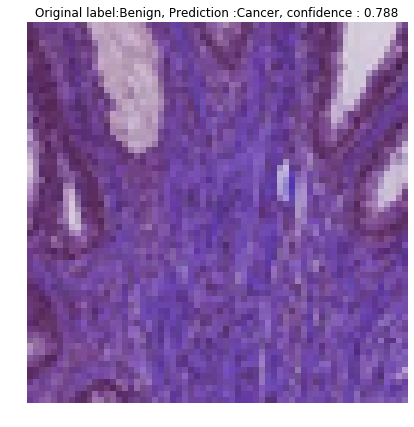

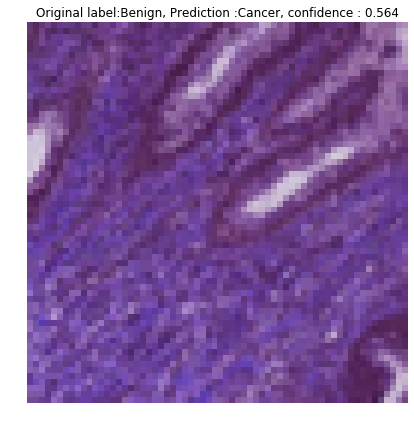

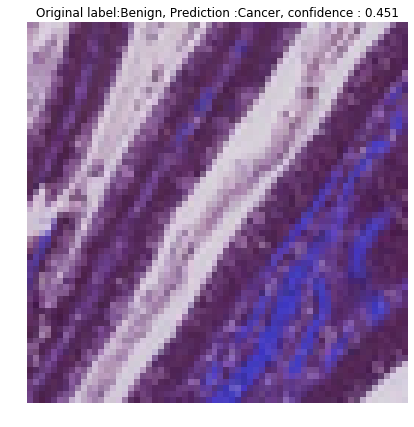

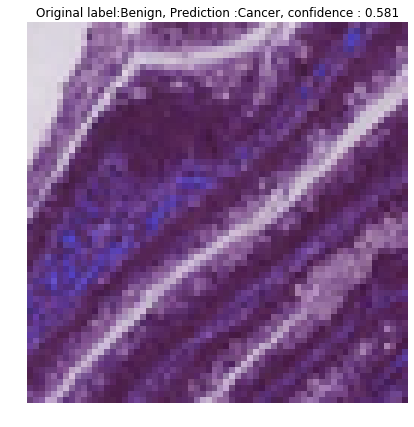

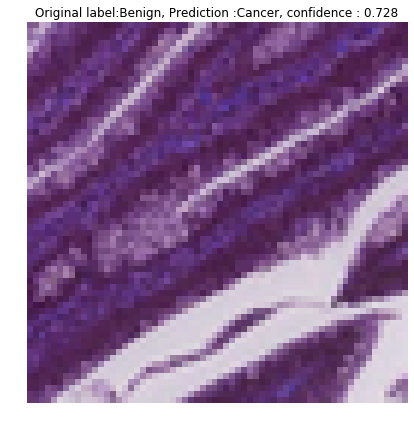

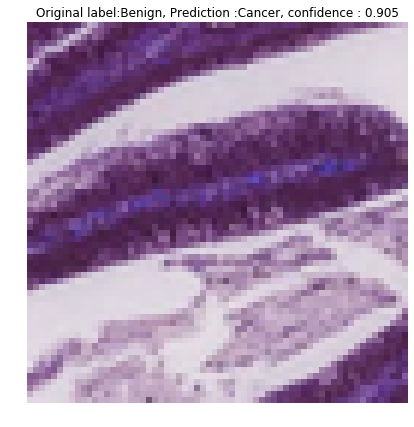

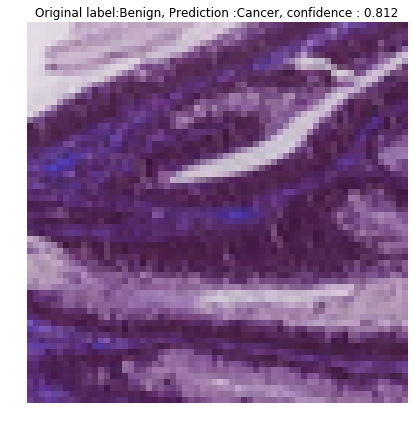

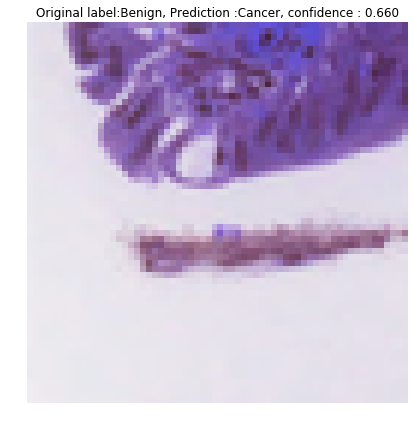

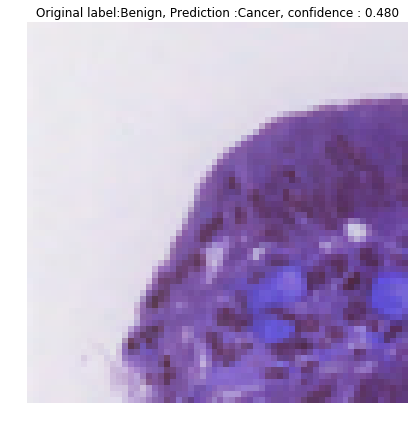

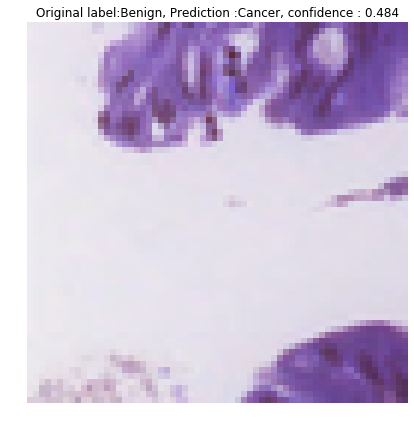

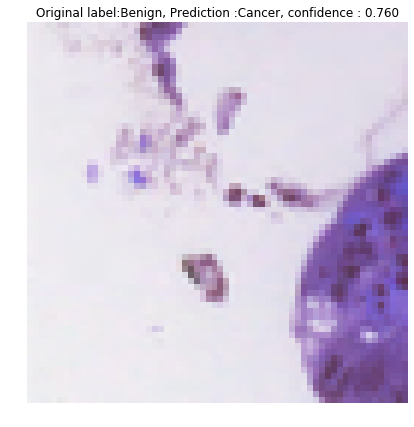

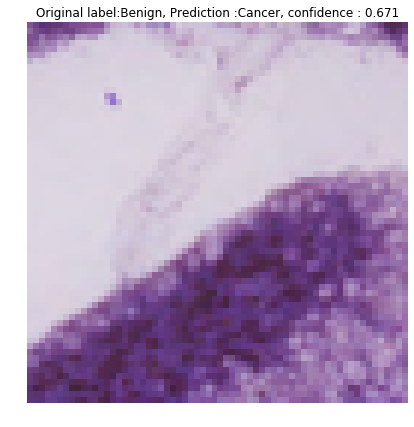

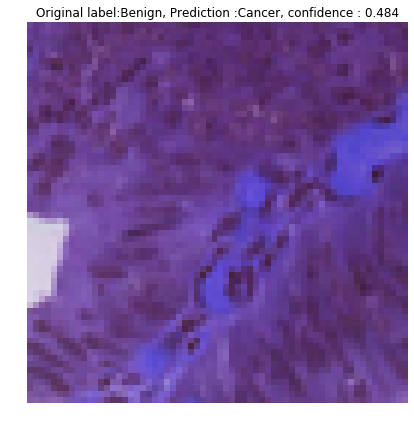

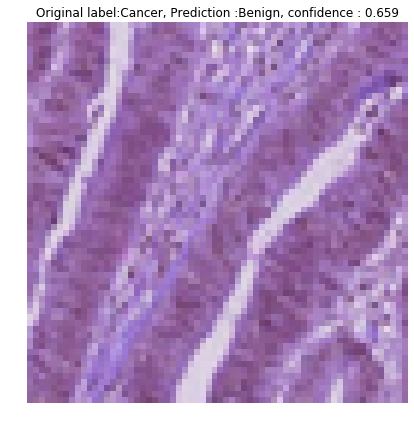

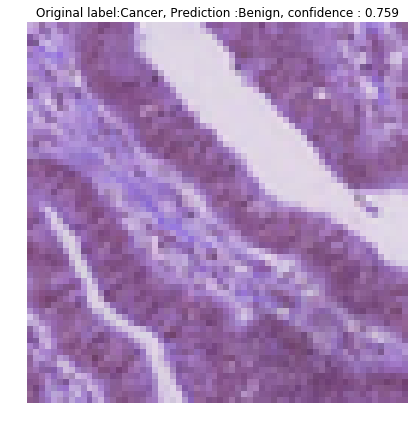

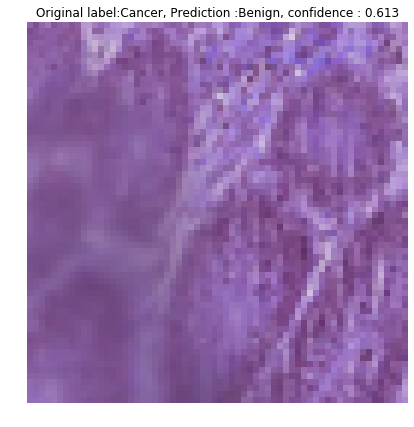

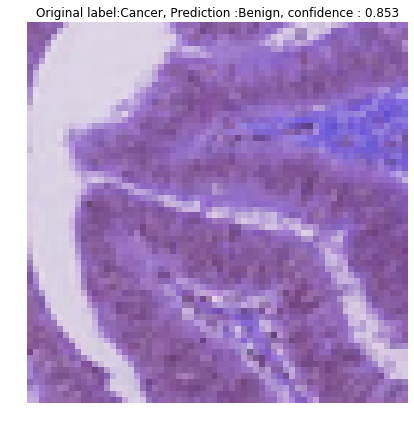

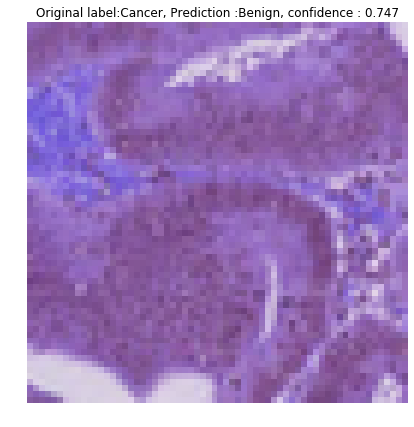

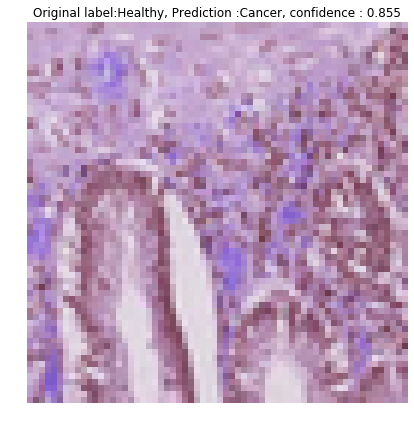

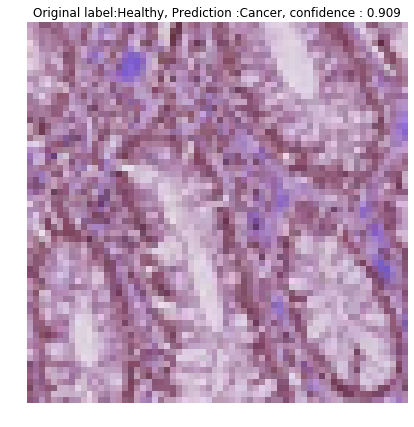

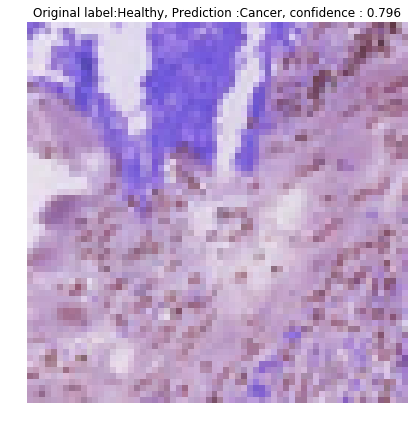

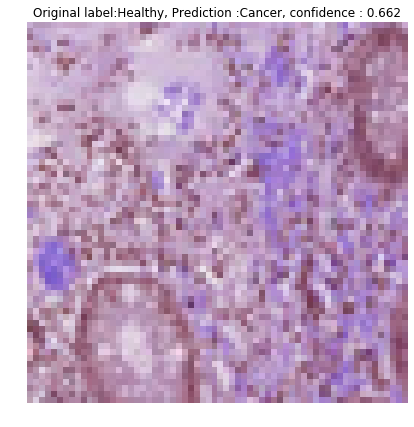

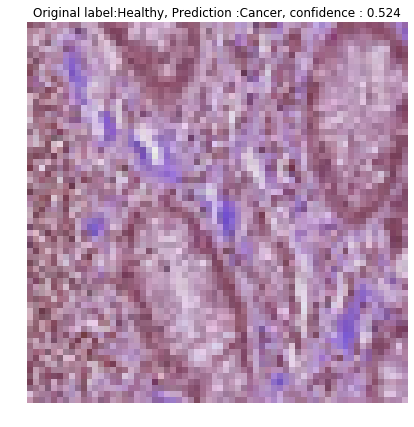

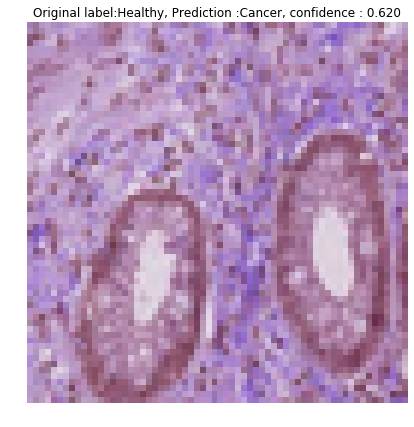

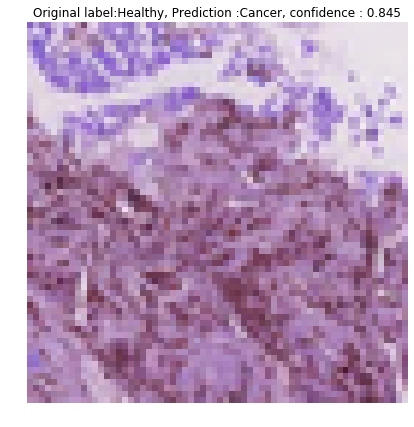

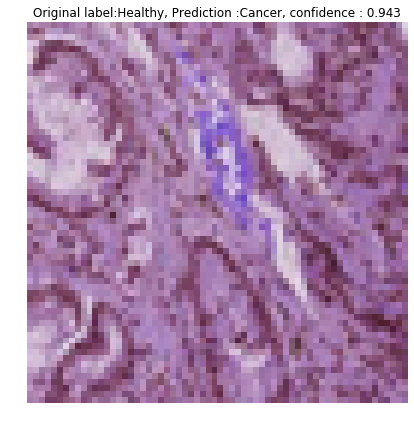

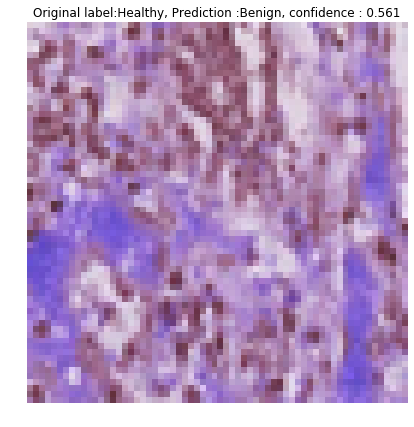

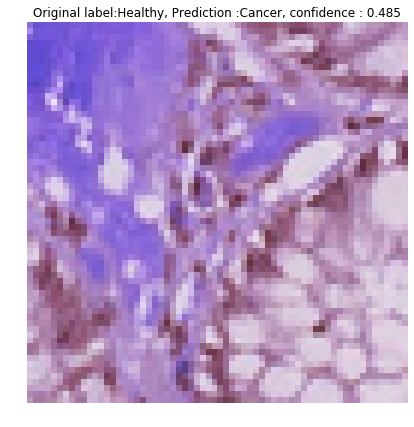

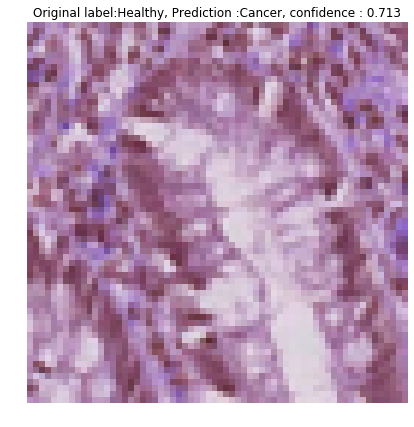

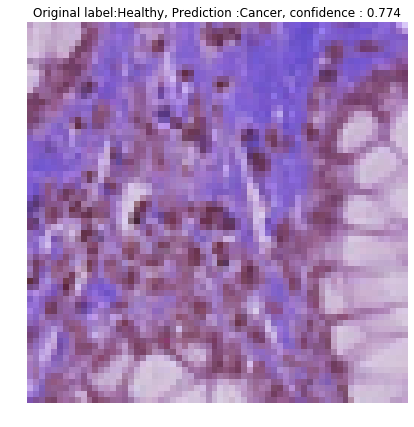

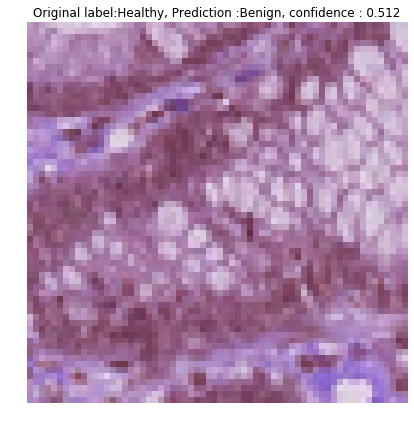

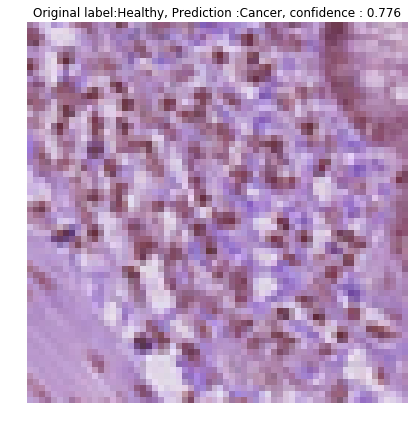

In [9]:
#PER VEDERE GLI ERRORI DI PREDIZIONE SULLE IMMAGINI STESS PUò ESSERE ADATTATO PER VEDERE QUALE PREDICTION CORRISPONDE A QUALE IMMAGINE
import cv2
from keras.models import load_model
model = load_model("/content/gdrive/My Drive/Bioinformatica/balancedtrain_resnet50.h5")

test_dir = '/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Test/Patches'

test_generator = ImageDataGenerator().flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=429, class_mode='categorical', shuffle=False)


# Get the filenames from the generator
fnames = test_generator.filenames
 
# Get the ground truth from generator
ground_truth = test_generator.classes
 
# Get the label to class mapping from the generator
label2index = test_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = cv2.imread('{}/{}'.format(test_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

**USE BOTTLENECK FEATURES TO RE-TRAIN THE MODEL AND IMPROVE ACCURACY**

In [0]:
#TO DO

**USE SVM AT THE END OF A CNN**

In [0]:
#TO DO

**VGG19 TRAINING TEST ON AUGMENTED DATASET**

80142336/80134624 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f88cf783978> False
<keras.layers.convolutional.Conv2D object at 0x7f86c005add8> False
<keras.layers.convolutional.Conv2D object at 0x7f86c005ac50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f86c002e320> False
<keras.layers.convolutional.Conv2D object at 0x7f86c0089f28> False
<keras.layers.convolutional.Conv2D object at 0x7f86bffdcef0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f86c00056a0> False
<keras.layers.convolutional.Conv2D object at 0x7f86c0005208> False
<keras.layers.convolutional.Conv2D object at 0x7f86bffb2358> False
<keras.layers.convolutional.Conv2D object at 0x7f86bffcd978> False
<keras.layers.convolutional.Conv2D object at 0x7f86bff64f98> False
<keras.layers.pooling.MaxPooling2D object at 0x7f86bff92358> False
<keras.layers.convolutional.Conv2D object at 0x7f86bff92c88> False
<keras.layers.convolutional.Conv2D object at 0x7f86bff3d198> F

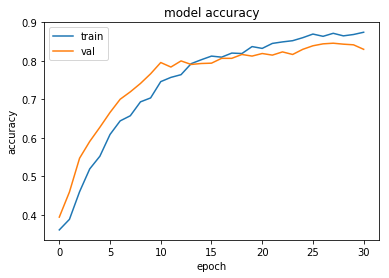

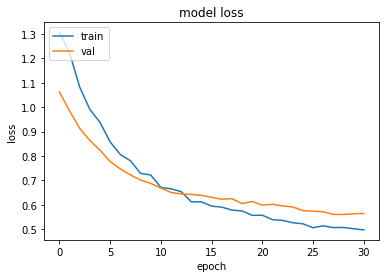

Found 429 images belonging to 3 classes.
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.2)
Normalized confusion matrix
[[0.90277778 0.09722222 0.        ]
 [0.0942029  0.89855072 0.00724638]
 [0.02721088 0.06802721 0.9047619 ]]


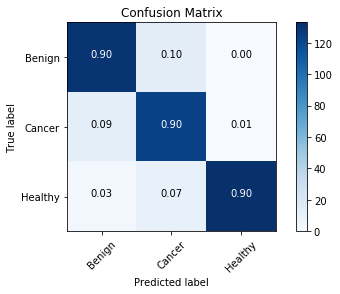

In [28]:
import numpy as np
!pip3 install keras
!pip3 install tensorflow
!pip install mxnet-mkl
!pip3 install sklearn
!pip3 install keras_tqdm
!pip install scipy
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import *
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications import VGG19
#Load the VGG model
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(64, 64, 3))



# Freeze the layers except the last 4 layers
for layer in vgg19_model.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg19_model.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
newVGG19_model = models.Sequential()
 
# Add the vgg convolutional base model
newVGG19_model.add(vgg19_model)
 
# Add new layers
newVGG19_model.add(Flatten())
newVGG19_model.add(Dense(1024))
newVGG19_model.add(BatchNormalization())
newVGG19_model.add(Activation('relu'))
newVGG19_model.add(Dropout(0.5))

newVGG19_model.add(Dense(512))
newVGG19_model.add(BatchNormalization())
newVGG19_model.add(Activation('relu'))
newVGG19_model.add(Dropout(0.5))

newVGG19_model.add(Dense(64))
newVGG19_model.add(BatchNormalization())
newVGG19_model.add(Activation('relu'))
newVGG19_model.add(Dropout(0.5))

newVGG19_model.add(Dense(3))
newVGG19_model.add(BatchNormalization())
newVGG19_model.add(Activation('softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
newVGG19_model.summary()

train_path="/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Training/Patches"
valid_path="/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Validation/Patches"
test_path="/content/gdrive/My Drive/Bioinformatica/Organized balanced dataset/Test/Patches"

#test with augmentation on the fly

train_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=10,
      #width_shift_range=0.1, #tolgo per ottenere migliori risultati
      #height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='reflect')


validation_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=10,
      #width_shift_range=0.1, #tolgo per ottenere migliori risultati
      #height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='reflect')


#test with no augmentation on the fly
#train_datagen = ImageDataGenerator()
#validation_datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=100,
    class_mode='categorical',
    color_mode='rgb')

validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size=(64, 64),
    batch_size= 100,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False)

es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

# Compile the model
newVGG19_model.compile(loss='categorical_crossentropy',optimizer=
              keras.optimizers.SGD(lr=0.0001, momentum=0.9, decay=1e-6, nesterov=True),
              metrics=['accuracy'])
# Train the model
history = newVGG19_model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size, verbose=1, callbacks=[es])

def printGraph(history):
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
 
# Save the model
#newVGG19_model.save('/content/gdrive/My Drive/Bioinformatica/VGG19noaugtry.h5')
newVGG19_model.save('/content/gdrive/My Drive/Bioinformatica/balancedtrain_VGG19.h5')

printGraph(history)

generator = ImageDataGenerator().flow_from_directory(
        test_path,
        target_size=(64, 64),
        batch_size=429, class_mode='categorical', shuffle = False)

probabilities = newVGG19_model.predict_generator(generator, 1)

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):

#This function prints and plots the confusion matrix.
#Normalization can ben applied by setting 'normalize-True'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
           plt.text(j, i, "{:0.2f}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
        else:
           plt.text(j, i, format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

!pip3 install -U scikit-learn
from sklearn.metrics import confusion_matrix

#MULTI-LABEL CONFUSION MATRIX
test_dir, test_labels = next(generator)
test_img = [ np.argmax(t) for t in test_labels ]
num_pred = [ np.argmax(t) for t in probabilities ]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_img, num_pred)

cm_plot_labels = ['Benign','Cancer','Healthy']
plot_confusion_matrix(conf_mat,cm_plot_labels,normalize=True,title ='Confusion Matrix')